## 1. Importing and Reading Data

In [1]:
# Load the pandas, matplotlib and seaborn libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)

In [2]:
# Load the dataset to a pandas dataframe
store = pd.read_csv('SampleSuperStore.csv')
store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## 2. Data Understanding

In [3]:
# Check the dimensions of the data
store.shape

(9994, 13)

In [4]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 3. Data Preparation

In [8]:
# Rename the columns to remove spaces
store = store.rename(columns={'Postal Code': 'Postal_Code',
                      'Ship Mode': 'Ship_Mode'})

In [9]:
# Drop the country since it is constant
store = store.drop('Country', axis=1)

In [10]:
# Check for missing values
store.isna().sum()

Ship_Mode       0
Segment         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# Determine the loss-making products
store_loss = store.query('Profit < 0').copy()
store_loss.reset_index(drop=True)

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
2,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
3,Second Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
4,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Standard Class,Corporate,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
1867,Standard Class,Home Office,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
1868,Standard Class,Consumer,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
1869,Second Class,Corporate,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


## 4. Data Visualization

In [12]:
# Indicate how the top 20 cities with highest quantities of loss-making products
cities = store_loss['City'] \
    .value_counts() \
    .head(20)

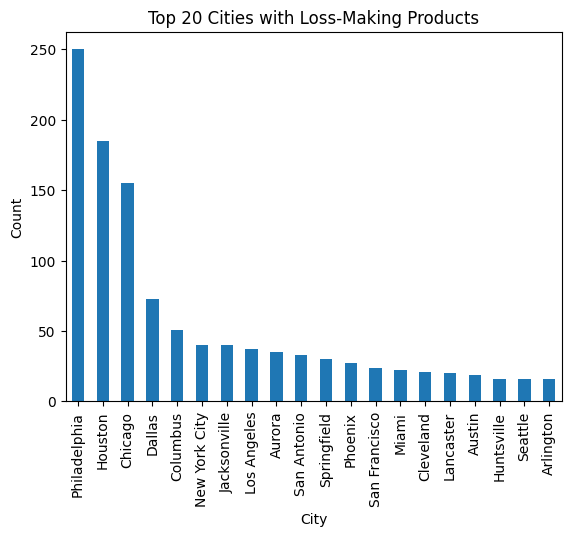

In [13]:
graph = cities \
    .plot(kind='bar', title="Top 20 Cities with Loss-Making Products")
graph.set_xlabel("City")
graph.set_ylabel("Count")
plt.savefig("CitiesWithLossMakingProducts.png")
plt.show()

In [14]:
# Find top 20 products with highest losses
products = store_loss['Sub-Category'] \
    .value_counts() \
    .head(20)

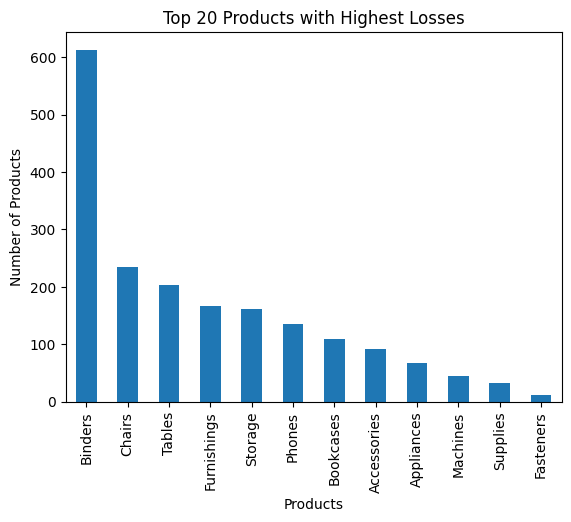

In [15]:
# Visualize this on a graph
graph = products\
            .plot(kind='bar', title='Top 20 Products with Highest Losses')
graph.set_xlabel('Products')
graph.set_ylabel('Number of Products')
plt.savefig('LossMakingProducts.png')
plt.show()

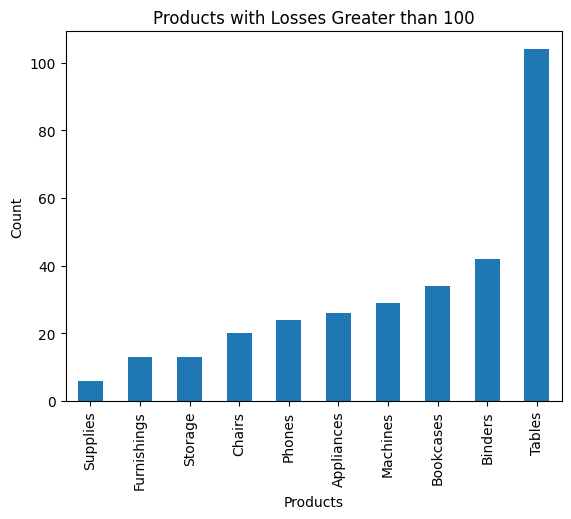

In [16]:
# Find Products with Losses Greater than 100
graph = store_loss.query('Profit < -100')\
            .groupby('Sub-Category')['Sub-Category'] \
            .agg(['count']) \
            .sort_values('count')['count'] \
            .head(20) \
            .plot(kind='bar', title='Products with Losses Greater than 100')
graph.set_xlabel('Products')
graph.set_ylabel('Count')
plt.savefig('HighestLosses.png')
plt.show()

In [17]:
store_loss

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [18]:
# Drop some unused columns
store_col = store_loss[['City', 'State', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']].reset_index(drop=True).copy()
store_col

,City,State,Sub-Category,Sales,Quantity,Discount,Profit
0,Fort Lauderdale,Florida,Tables,957.5775,5,0.45,-383.0310
1,Fort Worth,Texas,Appliances,68.8100,5,0.80,-123.8580
2,Fort Worth,Texas,Binders,2.5440,3,0.80,-3.8160
3,Philadelphia,Pennsylvania,Chairs,71.3720,2,0.30,-1.0196
4,Philadelphia,Pennsylvania,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...
1866,Bryan,Texas,Binders,22.3860,7,0.80,-35.8176
1867,Akron,Ohio,Binders,5.7420,3,0.70,-4.5936
1868,San Bernardino,California,Bookcases,683.3320,4,0.15,-40.1960
1869,Los Angeles,California,Tables,71.0880,2,0.20,-1.7772


In [19]:
# Determine discounts greater than 25%
discount_store = store_col.query('Discount >= 0.25').reset_index(drop=True).copy()
discount_store

,City,State,Sub-Category,Sales,Quantity,Discount,Profit
0,Fort Lauderdale,Florida,Tables,957.5775,5,0.45,-383.0310
1,Fort Worth,Texas,Appliances,68.8100,5,0.80,-123.8580
2,Fort Worth,Texas,Binders,2.5440,3,0.80,-3.8160
3,Philadelphia,Pennsylvania,Chairs,71.3720,2,0.30,-1.0196
4,Philadelphia,Pennsylvania,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...
1343,Carrollton,Texas,Furnishings,25.1280,3,0.60,-6.9102
1344,Bryan,Texas,Chairs,528.4300,5,0.30,-143.4310
1345,Bryan,Texas,Binders,22.3860,7,0.80,-35.8176
1346,Akron,Ohio,Binders,5.7420,3,0.70,-4.5936


In [20]:
# Find sum of product losses
discount_store.fillna(0).groupby('Sub-Category')['Profit'].sum()

Sub-Category
Appliances     -8629.6412
Binders       -38510.4964
Bookcases     -11097.7614
Chairs         -6737.1167
Furnishings    -5944.6552
Machines      -30118.6682
Phones         -6715.7800
Tables        -30761.1238
Name: Profit, dtype: float64